<a href="https://colab.research.google.com/github/MariaPetrovskaya/Data-Science-for-HR/blob/main/Labor_market_analysis/Labor_market_analysis_DA_DS__job_offers_in_Europe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project description



*   Initial data - dataset or row job advertisements HTML files from LinkedIn, from may 2023

*   Business tast - to systematize and analyze information on job offers, to make survey of the current labor market in the EU. Prepare data for visual presentation and create dashboards in Power BI.

*   Presentation of results - analytical dataset in .csv format, dashboards in Power BI, PDF slides.



In [2]:
# import
import pandas as pd
from bs4 import BeautifulSoup
from IPython.display import display, HTML
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from datetime import date

In [3]:
from google.colab import drive
from google.colab import files

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Data download

In [6]:
# first version of dataset
db=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parsing LinkedIn DA /Copy of masterskaya_parsing_LinkedIn_2023_05_23.csv')


In [7]:
# dataset copy for transformation
df=db.copy()

In [8]:
display(HTML(db['html'][331]))

#Parsing and Lexical Analysis

In [9]:
# list of skills
skills_lst = [
    'a/b testing', 'ab testing', 'actian', 'adobe analytics', 'adobe audience manager',
    'adobe experience platform', 'adobe launch', 'adobe target', ' ai', 'airflow',
    'alooma', 'alteryx', 'amazon machine learning', 'amazon web services', 'aml',
    'amplitude', 'ansible', 'apache camel', 'apache nifi', 'apache spark',
    'api', 'asana', 'auth0', 'aws', 'aws glue', 'azure', 'azure data factory',
    'basecamp', 'bash', 'beats', 'big query', 'bigquery', 'birst', 'bitbucket',
    'blendo', 'bootstrap', 'business objects bi', 'c#', 'c++', 'caffe', 'cassandra',
    'cdata sync', 'chronograf', 'ci/cd', 'cicd', 'clickhouse', 'cloudera', 'cluvio',
    'cntk', 'cognos', 'composer', 'computer vision', 'conda', 'confluence',
    'couchbase', 'css', 'd3.js', 'dash', 'dashboard', 'data factory', 'data fusion',
    'data mining', 'data studio', 'data warehouse', 'databricks', 'dataddo',
    'dataflow', 'datahub', 'dataiku', 'datastage', 'dbconvert', 'dbeaver', 'dbt',
    'deep learning', 'dl/ml', 'docker', 'domo', 'dune', 'dv360', 'dynamodb',
    'elasticsearch', 'elt', 'erwin', 'etl', 'etleap', 'excel', 'facebook business manager',
    'fivetran', 'fuzzy', 'ga360', 'gcp', 'gensim', 'ggplot', 'git', 'github', 'gitlab',
    'google ads', 'google analytics', 'google cloud platform', 'google data flow',
    'google optimize', 'google sheets', 'google tag manager', 'google workspace',
    'grafana', 'hadoop', 'hana', 'hanagrafana', 'hbase', 'hdfs', 'hevo data', 'hightouch',
    'hive', 'hivedatabricks', 'html', 'hubspot', 'ibm coremetrics', 'inetsoft',
    'influxdb', 'informatica', 'integrate.io', 'iri voracity', 'izenda', 'java',
    'java script', 'javascript', 'jenkins', 'jira', 'jmp', 'julia', 'jupyter',
    'k2view', 'kafka', 'kantar', 'kapacitor', 'keras', 'kibana', 'kubernetes',
    'lambda', 'linux', 'logstash', 'looker', 'lstm', 'luidgi', 'matillion', 'matlab',
    'matplotlib', 'mendix', 'metabase', 'microsoft sql', 'microsoft sql server',
    'microstrategy', 'miro', 'mixpanel', 'ml', 'ml flow', 'mlflow', 'mongodb', 'mxnet',
    'mysql', 'natural nanguage processing', 'neo4j', 'nlp', 'nltk', 'nosql', 'numpy',
    'oauth', 'octave', 'omniture', 'omnituregitlab', 'openshift', 'openstack',
    'optimizely', 'oracle', 'oracle business intelligence', 'oracle data integrator',
    'pandas', 'panorama', 'pentaho', 'plotly', 'postgre', 'postgresql', 'posthog',
    'power amc', 'power bi', 'power point', 'powerbi', 'powerpivot', 'powerpoint',
    'powerquery', 'pyspark', 'python', 'pytorch', 'pytorchhevo data', 'qlik',
    'qlik sense', 'qlikview', 'querysurge', ' r ', 'raphtory', 'rapidminer', 'redash',
    'redis', 'redshift', 'retool', 'rivery', 'rust', 's3', 'sa360', 'salesforce', 'sap',
    'sap business objects', 'sas', 'sas visual analytics', 'scala', 'scikit-learn',
    'scipy', 'seaborn', 'segment', 'selenium', 'sem rush', 'semrush', 'shell', 'shiny',
    'singer', 'sisense', 'skyvia', 'snowflake', 'spacy', 'spark', 'sparkml', 'splunk',
    'spotfire', 'spreadsheet', 'spss', 'sql', 'ssis', 'sssr', 'stambia', 'statistics',
    'statsbot', 'stitch', 'streamlit', 'streamsets', 'svn', 't-sql', 'tableau', 'talend',
    'targit', 'tealium', 'telegraf', 'tensorflow', 'terraapi', 'terraform', 'theano',
    'thoughtspot', 'timeseries', 'trello', 'unix', 'vba', 'vtom', 'webfocus', 'wfh',
    'xplenty', 'xtract.io', 'yellowfin'
]

In [10]:
# display page
display(HTML(db['html'][2]))

## Lexer

### Vacancy title

In [11]:
# to get vacancy names
def get_title(cell):
  soup = BeautifulSoup(cell, 'lxml')
  job_title =soup.find('h2',{'class':"t-24 t-bold jobs-unified-top-card__job-title"}).text.strip()
  return job_title


In [12]:
get_title(db['html'][206])

'Data Analyst – Web & App (m/w/d)'

In [13]:
# проверка работы функции на ошибки
for i in range(998):
  get_title(db['html'][i])

### Skills


In [14]:
# get skills function
def get_skills(cell):
  soup = BeautifulSoup(cell, 'lxml')
#  from skills field
  try:
    skills = soup.find('span', {'aria-hidden': 'true'}).text.split(':')[1].split(',')
    skills1 = [j.strip().lower() for j in skills][0:2]
  except:
    try :
      skills1 = [i.text.lower() for i in soup.find_all('li')]
      if len(skills1[0])>3:
        skills1 = []
    except:
        skills1 = []
# some skills may be found in vacancy description
  description_vacancy = soup.find('article', class_="jobs-description__container m4").text.lower()
  skills_vacancy=[]
  for skill in skills_lst:
    pattern = r'\b' + re.escape(skill)+ r'\b'
# to compare with skills list
    if re.search(pattern, description_vacancy) and not re.search(pattern, ' '.join(skills1)):

      skills_vacancy.append(skill)
  skills_vacancy.extend(skills1)
  # if not in list return nan
  if skills_vacancy == []:
    return np.nan
  else:
    return skills_vacancy

In [15]:
get_skills(db['html'][7])

['data mining', 'excel']

In [16]:
for i in range(998):
  get_skills(df['html'][i])

### Format of employment

---



In [17]:
def get_type_of_job(cell):
  soup = BeautifulSoup(cell, 'lxml')
  try:
    type_of_work = soup.find('span', class_="jobs-unified-top-card__workplace-type").text
    return type_of_work
  except:
    type_of_work = np.nan
    return type_of_work

In [18]:
get_type_of_job(df['html'][1])

'On-site'

In [19]:
for i in range(998):
  get_type_of_job(df['html'][i])

### Country

In [20]:
def get_country(cell):
  soup = BeautifulSoup(cell, 'lxml')
  country=soup.find('div', class_="t-14 truncate").find('span',class_="jobs-unified-top-card__bullet")
  return (country.text.split(',')[-1].strip())

In [21]:
get_country(df['html'][1])

'United Kingdom'

In [22]:
for i in range(998):
  get_country(df['html'][i])

### City

In [23]:
def get_city(cell):
  soup = BeautifulSoup(cell, 'lxml')
  city=soup.find('div', class_="t-14 truncate").find('span',class_="jobs-unified-top-card__bullet")
  if len(city.text.split(',')) > 1:
    return(city.text.split(',')[0].strip())
  else :
    return np.nan

In [24]:
get_city(db['html'][295])

nan

In [25]:
for i in range(998):
  get_city(df['html'][i])

### Publication date

In [26]:
def get_date_publish(cell):
  soup = BeautifulSoup(cell, 'lxml')
  date_of_file = datetime.strptime('23.05.2023', "%d.%m.%Y").date()
  date_of_publication = soup.find('span',class_="jobs-unified-top-card__posted-date").text.strip()
  if 'week' in date_of_publication.split()[1]:
    date_publication = date_of_file - timedelta(weeks=int(date_of_publication.split()[0]))
  elif 'day' in date_of_publication.split()[1]:
    date_publication = date_of_file - timedelta(days=int(date_of_publication.split()[0]))
  elif 'minut' in date_of_publication.split()[1] or 'hour' in date_of_publication.split()[1]:
    date_publication = date_of_file
  return date_publication.strftime('%d.%m.%Y')

In [27]:
get_date_publish(df['html'][497])

'23.05.2023'

In [28]:
for i in range(998):
  get_date_publish(df['html'][i])

### Company name





In [29]:
def get_company(cell):
  soup = BeautifulSoup(cell, 'lxml')
  company = soup.find('span', class_ = 'jobs-unified-top-card__company-name').text.strip()
  return company

In [30]:
get_company(df['html'][10])

'Mexa Solutions'

In [31]:
for i in range(998):
  get_company(df['html'][i])

### Сompany scope

In [32]:
def get_company_field(cell):
  soup = BeautifulSoup(cell, 'lxml')
  try:
    str1=soup.find_all('li', class_ = 'jobs-unified-top-card__job-insight')[1].text.replace('\n','')
    return re.search(r'(?<=employees .)\D+',str1).group().strip()
  except:
    try:
      return soup.find('div',{'class':"t-14 mt5"}).text.strip().split('\n')[0]
    except:
      return np.nan


In [33]:
for i in range(998):
  get_company_field(df['html'][i])

In [34]:
get_company_field(df['html'][497])

'Venture Capital & Private Equity'

### Number of applicants

In [35]:
def get_number_of_applicants(cell):
  soup = BeautifulSoup(cell, 'lxml')
  try:
    number_of_candidates=soup.find('span', class_="jobs-unified-top-card__applicant-count")
    candidates_cnt = int(re.search('[0-9]+',number_of_candidates.text).group())

  except:
    try:
      # keywords are "See how you compare to"
      applicants = re.search(r'(?<=See how you compare to )\d+', str(soup.find_all('span'))).group()
      candidates_cnt = int(applicants)
    except:
      candidates_cnt = np.nan
  return   candidates_cnt


In [36]:
get_number_of_applicants(df['html'][56])

42

In [37]:
for i in range(998):
  get_number_of_applicants(df['html'][i])

### Company size

In [38]:
def get_size(cell):
  soup = BeautifulSoup(cell, 'lxml')
  try:
    str1=soup.find_all('li', class_ = 'jobs-unified-top-card__job-insight')[1].text
    return re.search(r'(\d(.|,)\d+-\d+(.|,)\d+)|(\d+-\d+)|(\d+\W\d+\W)',str1).group()
  except:
    return np.nan

In [39]:
get_size(db['html'][56])

'501-1,000'

In [40]:
for i in range(998):
  get_size(df['html'][i])

In [41]:
# finction dictionary
dict=({'title': get_title,
       'city':get_city,
        'country':get_country,
       'company':get_company,
       'size_of_company': get_size,
       'company_field':get_company_field,
       'date_of_publication':get_date_publish,
       'number_of_applicants': get_number_of_applicants,
       'type_of_employment' : get_type_of_job, 'skills' : get_skills
       })


### Dataset assembly

In [42]:
for key in dict:
  print(f"The column has been added '{key}'")
  df[key]=df['html'].apply(dict[key])


The column has been added 'title'
The column has been added 'city'
The column has been added 'country'
The column has been added 'company'
The column has been added 'size_of_company'
The column has been added 'company_field'
The column has been added 'date_of_publication'
The column has been added 'number_of_applicants'
The column has been added 'type_of_employment'
The column has been added 'skills'


#Data Preprocessing

#### Formats conversion

In [43]:
# date formats conversion
df['date_of_publication'] = pd.to_datetime(df['date_of_publication'],format='%d.%m.%Y')

#### Columns renaming, adding, removing

In [44]:
df.columns.values

array(['Unnamed: 0', 'html', 'title', 'city', 'country', 'company',
       'size_of_company', 'company_field', 'date_of_publication',
       'number_of_applicants', 'type_of_employment', 'skills'],
      dtype=object)

In [45]:
# rename column, create id
df.rename(columns={'Unnamed: 0':'id'}, inplace=True)

In [46]:
# delate column wit html
df.drop('html',  axis=1, inplace=True)

In [47]:
df.columns.values

array(['id', 'title', 'city', 'country', 'company', 'size_of_company',
       'company_field', 'date_of_publication', 'number_of_applicants',
       'type_of_employment', 'skills'], dtype=object)

#### Dataset viewing

In [48]:
"""
describe_column, function for columns:
- number of missing data,
- unique values for type 'object
the input is a column
"""
def describe_column(column):
    print('Data type:', column.dtypes)
    print(f'Number of missing data: {column.isna().sum()}, percentage {round(column.isna().sum()/column.shape[0]*100,2)}%')
    if column.dtypes == 'object' and column.name != 'skills':
        print('Unique values in column', column.sort_values().unique())
    if column.name != 'skills':
      print('Unique values', column.sort_values().nunique())

      print('Data description:')
      print(column.describe())
#variable distribution
    if column.name == 'number_of_applicants':
        sns.histplot(x=column, data=df,stat ='density',common_norm=False, kde=True)
        plt.title(f'Variable distribution\n Number of applicants ')
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()
        sns.boxplot(x=column, data=df)
        plt.title(f'Boxplot\n Number of applicants')
        plt.xlabel('Number of applicants')
        plt.grid(True)
        plt.show()

    print()

In [49]:
# view functon

"""
for dataframe, with describe_column function
"""
def description_files(df):

    print(f'Start view')
    print()
    print('View first 5 rows')
    display(df.head(5))
    print()
    print('*'*50)
    print('Data types')
    df.info()
    print()
    print('*'*50)
    print('Missing data')
    display(df.isna().sum())
    print('Column values')
    print()
    print('*'*50)
    for column in df.columns:
        columnSeriesObj = df[column]
        print(f"column: {column}")
        print()
        describe_column(df[column])
        print()

    print('Check duplicates')
    db = df.copy()
    db.drop('skills',  axis=1, inplace=True)
    if db.duplicated().sum() ==0:
        print('No obvious duplicates')
    else:
        print(f"Duplicates: {db.duplicated().sum()},percentage:{round(db.duplicated().sum()/db.shape[0]*100,2)} %")

Start view

View first 5 rows


,id,title,city,country,company,size_of_company,company_field,date_of_publication,number_of_applicants,type_of_employment,skills
0,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,"[data mining, excel, sap, sas, spss, sql, stat..."
1,1,Data Analyst - Logistics,Coventry,United Kingdom,Resolute Recruitment,NaN,NaN,2023-05-16,NaN,On-site,NaN
2,2,Data Analyst - Logistics,Coventry,United Kingdom,Resolute Recruitment,NaN,NaN,2023-05-16,NaN,On-site,[wfh]
3,3,Data Analyst (Space & Planning),South Molton,United Kingdom,Mole Valley Farmers,NaN,NaN,2023-05-16,NaN,On-site,[excel]
4,4,Data Analyst,Lugano,Switzerland,FORFIRM,NaN,NaN,2023-05-09,NaN,On-site,"[aws, data warehouse, etl, gcp, oracle, oracle..."



**************************************************
Data types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    998 non-null    int64         
 1   title                 998 non-null    object        
 2   city                  880 non-null    object        
 3   country               998 non-null    object        
 4   company               998 non-null    object        
 5   size_of_company       971 non-null    object        
 6   company_field         973 non-null    object        
 7   date_of_publication   998 non-null    datetime64[ns]
 8   number_of_applicants  941 non-null    float64       
 9   type_of_employment    930 non-null    object        
 10  skills                979 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 85.9+

id                        0
title                     0
city                    118
country                   0
company                   0
size_of_company          27
company_field            25
date_of_publication       0
number_of_applicants     57
type_of_employment       68
skills                   19
dtype: int64

Column values

**************************************************
column: id

Data type: int64
Number of missing data: 0, percentage 0.0%
Unique values 998
Data description:
count    998.000000
mean     498.500000
std      288.242086
min        0.000000
25%      249.250000
50%      498.500000
75%      747.750000
max      997.000000
Name: id, dtype: float64


column: title

Data type: object
Number of missing data: 0, percentage 0.0%
Unique values in column ['(ESG) Data Analyst (w/m/d)'
 '(Junior) Application Specialist eCommerce (m/f/d)'
 '(Junior) Business Analyst (f/m/d)' '(Junior) Business Analyst (w/m/d)'
 '(Junior) Consumer Business Intelligence Analyst (m/w/d)'
 '(Junior) Data Scientist' '(Junior) Project Analyst (m/f/d)'
 '(Junior) Project Coordinator'
 '(Junior) Systems Business Analyst (f/m/d)'
 '(Senior) Consultant Transaction Analytics (f/m/d)'
 '360 Data Product Owner' 'AFC Data Analyst'
 'ALTERNANCE - Assistance Data Analyst et Reporting RH F/H'
 'ANALISTA (H/M) FINANCIERO

<ipython-input-48-208d2542898d>:16: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(column.describe())


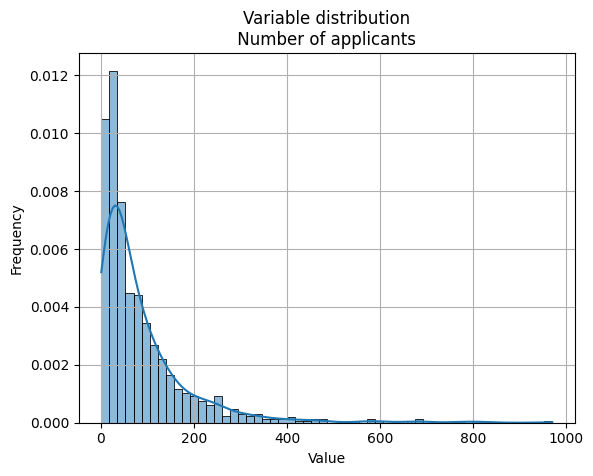

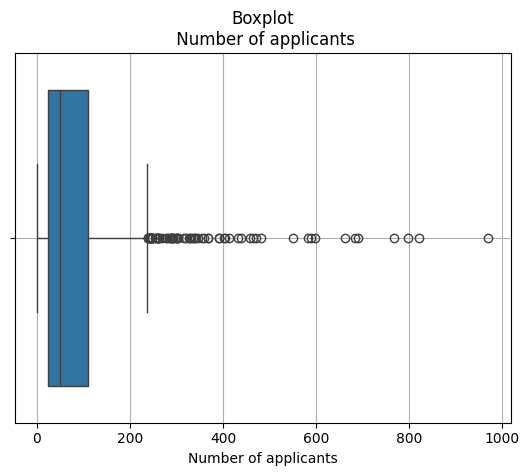



column: type_of_employment

Data type: object
Number of missing data: 68, percentage 6.81%
Unique values in column ['Hybrid' 'On-site' 'Remote' nan]
Unique values 3
Data description:
count        930
unique         3
top       Hybrid
freq         486
Name: type_of_employment, dtype: object


column: skills

Data type: object
Number of missing data: 19, percentage 1.9%


Check duplicates
No obvious duplicates


In [50]:
# viev data
description_files(df)

<div style='border:solid blue 1px; padding: 10px'>    
<b> Notes about data:</b>

Missing data in columns:
- `city`  - 118
- `size_of_company` - 27
- `company_field`  - 25
- `number_of_applicants`  - 57
- `type_of_employment`  - 68
- `skills` - 19

No obvious duplicates found.

implicit duplicates detected:
- cities and countries naming, for example:
  - City, County, Region
  - Frankfurt am Main
	- Metropolitan, Area, Greater, Region, Bonn
  
Contries naming and cities naming may be mixed up


#### Handling implicit duplicates

In [51]:
df['city'] = df['city'].replace(r'(\s|\b)County(\s|\b)', '', regex=True)
df['city'] = df['city'].replace(r'(\s|\b)City(\s|\b)', '', regex=True)
df['city'] = df['city'].replace(r'\s+\bRegion\b', '', regex=True)
df['city'] = df['city'].replace(r' \bArea\b', '', regex=True)
df['city'] = df['city'].replace('Frankfurt am Main', 'Frankfurt', regex=True)
df['city'] = df['city'].replace('ł', 'l', regex=True)
df['city'] = df['city'].replace('ü', 'u', regex=True)


In [52]:
df['country'] = df['country'].replace(r'\s+\bMetropolitan\b', '', regex=True)
df['country'] = df['country'].replace(r'\s+\bRegion\b', '', regex=True)
df['country'] = df['country'].replace(r'\bGreater \b', '', regex=True)
df['country'] = df['country'].replace(r' \bArea\b', '', regex=True)
df['country'] = df['country'].replace(r' \bBonn\b', '', regex=True)


In [53]:
df.query('company == "venITure"')

,id,title,city,country,company,size_of_company,company_field,date_of_publication,number_of_applicants,type_of_employment,skills
207,207,Data Analyst (m/w/d),Wiesbaden,Germany,venITure,51-200,Information Technology & Services,2023-05-16,102.0,On-site,"[looker, английский язык, компьютерная наука]"


In [54]:
db=df.dropna()

In [55]:
# dictionary with cities and countries
dict1 = {k : v for k,v in db[['city','country']].values}
countries = df['country'].sort_values().unique()
cities = df['city'].sort_values().unique()


In [56]:
df['country'].sort_values().unique()

array(['Amsterdam', 'Athens', 'Austria', 'Banska Bystrica', 'Barcelona',
       'Belgium', 'Berlin', 'Brussels', 'Bulgaria', 'Cologne',
       'Copenhagen', 'Croatia', 'Czechia', 'Denmark', 'Dijon',
       'Eindhoven', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iasi', 'Ireland', 'Italy', 'Krakow', 'Latvia',
       'Lisbon', 'Lithuania', 'Luxembourg', 'Lyon', 'Madrid', 'Malta',
       'Milan', 'Monaco', 'Munich', 'Munster', 'Netherlands', 'Norway',
       'Nuremberg', 'Oslo', 'Palma de Mallorca', 'Paris', 'Pau', 'Poland',
       'Portugal', 'Prague', 'Romania', 'Rotterdam and The Hague',
       'Slovakia', 'Spain', 'Stuttgart', 'Sweden', 'Switzerland',
       'United Kingdom', 'Verona', 'Warsaw', 'Wroclaw'], dtype=object)

In [57]:
df['city'].sort_values().unique()

array(["'s-Hertogenbosch", 'Aalborg', 'Ahlen', 'Aix-en-Provence',
       'Albuzzano', 'Alsónémedi', 'Amersfoort', 'Amstelveen', 'Amsterdam',
       'Ancona', 'Arcole', 'Arconate', 'Arluno', 'Arnhem',
       'Arrasate / Mondragón', 'Athens', 'Augusta', 'Baierbrunn',
       'Barcelona', 'Bari', 'Basel', 'Basingstoke', 'Bath', 'Belas',
       'Belfast', 'Bellinzago Lombardo', 'Bergamo', 'Bergen op Zoom',
       'Bergisch Gladbach', 'Berlin', 'Bernay', 'Bertrange',
       'Bilbao-Bilbo', 'Binasco', 'Birkirkara', 'Blackpool',
       'Boadilla del Monte', 'Bodelshausen', 'Bois-Colombes', 'Bollate',
       'Bologna', 'Bonn', 'Bordeaux', 'Boulogne-Billancourt', 'Bracknell',
       'Braine-l’Alleud', 'Bremen', 'Brindisi', 'Bristol', 'Brunswick',
       'Brussels', 'Bucharest', 'Buckinghamshire', 'Budapest',
       'Busto Arsizio', 'Bègles', 'Cagliari', 'Calvignasco', 'Cambridge',
       'Campodarsego', 'Canegrate', 'Carpi', 'Carpiano', "Cassano d'Adda",
       "Cassina de' Pecchi", 'Cerdanyola 

In [58]:
# for missing data in the "city" column return from "country"column
for country in countries:
  if country in cities:
    df.loc[(df['city'].isna())& (df['country']==country), 'city'] = df.query('city.isna() and country == @country')['city'].fillna(country)




In [59]:
# for missing data in the "country" column
for country in countries:
  if country in cities:
    try:
      df['country']=df['country'].replace(country,dict1[country])
    except:
      df['country']=df['country'].replace(country,np.nan)

In [60]:
# to check

df['country'].sort_values().unique()

array(['Austria', 'Banska Bystrica', 'Belgium', 'Bulgaria', 'Croatia',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iasi', 'Ireland', 'Italy', 'Krakow',
       'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Netherlands', 'Norway', 'Palma de Mallorca', 'Pau', 'Poland',
       'Portugal', 'Romania', 'Rotterdam and The Hague', 'Slovakia',
       'Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Verona'],
      dtype=object)

In [61]:
# for values ​​that were not in the dictionary

countries_dict = ({'Verona':'Italy',
                   'Krakow':'Poland',
                   'Palma de Mallorca':'Spain',
                   'Banska Bystrica':'Germany',
                   'Iasi':'Romania',
                   'Pau':'France',
                   'Rotterdam and The Hague':'Netherlands'})
for country in countries_dict:
    df.loc[(df['city'].isna())& (df['country']==country), 'city'] = df.query('city.isna() and country == @country')['city'].fillna(country)
    df['country']=df['country'].replace(country,countries_dict[country])

In [62]:
df['country'].sort_values().unique()

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark',
       'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
       'Monaco', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom'],
      dtype=object)

In [63]:
df['city'].sort_values().unique()

array(["'s-Hertogenbosch", 'Aalborg', 'Ahlen', 'Aix-en-Provence',
       'Albuzzano', 'Alsónémedi', 'Amersfoort', 'Amstelveen', 'Amsterdam',
       'Ancona', 'Arcole', 'Arconate', 'Arluno', 'Arnhem',
       'Arrasate / Mondragón', 'Athens', 'Augusta', 'Baierbrunn',
       'Banska Bystrica', 'Barcelona', 'Bari', 'Basel', 'Basingstoke',
       'Bath', 'Belas', 'Belfast', 'Bellinzago Lombardo', 'Bergamo',
       'Bergen op Zoom', 'Bergisch Gladbach', 'Berlin', 'Bernay',
       'Bertrange', 'Bilbao-Bilbo', 'Binasco', 'Birkirkara', 'Blackpool',
       'Boadilla del Monte', 'Bodelshausen', 'Bois-Colombes', 'Bollate',
       'Bologna', 'Bonn', 'Bordeaux', 'Boulogne-Billancourt', 'Bracknell',
       'Braine-l’Alleud', 'Bremen', 'Brindisi', 'Bristol', 'Brunswick',
       'Brussels', 'Bucharest', 'Buckinghamshire', 'Budapest',
       'Busto Arsizio', 'Bègles', 'Cagliari', 'Calvignasco', 'Cambridge',
       'Campodarsego', 'Canegrate', 'Carpi', 'Carpiano', "Cassano d'Adda",
       "Cassina de' Pe

In [64]:
df['city'].isna().sum()

50

number of missing data became less - 50 only

### Сreating categories for vacancies

In [65]:
# сreating categories for vacancies function

def sort_vacancy(str):
  if 'anal' in str.lower() and ('dat' in str.lower() or 'donne' in str.lower()):
    return 'data analyst'
  elif  'anal' in str.lower() and 'busin' in str.lower() or 'business intelligence'  in str.lower():
    return 'business analyst'
  elif   'dat' in str.lower() and 'scient' in str.lower():
    return 'data scientist'
  elif   'dat' in str.lower() and 'engin' in str.lower():
    return 'data engineer'
  elif   'anal' in str.lower() and ('fp&a' in str.lower() or 'financ' in str.lower()) :
    return 'financial analyst'
  elif   'anal' in str.lower() and ('solut' in str.lower() or 'syst' in str.lower()) :
    return 'system analyst'
  elif   'anal' in str.lower() and 'web' in str.lower() :
    return 'web analyst'
  elif 'anal' in str.lower():
    return 'analyst'
  else:
    return 'другое'

In [66]:
# sort_vacancy('Supply Chain Analyst')

In [67]:
df['vacancy'] = df['title'].apply(sort_vacancy)


In [68]:
df['vacancy'].unique()

array(['data analyst', 'business analyst', 'analyst', 'другое',
       'data scientist', 'web analyst', 'data engineer',
       'financial analyst', 'system analyst'], dtype=object)

<div style='border:solid blue 1px; padding: 10px'>    
<b> Notes about data:</b>

Each job description contains several “skills”. We need to transform this dataset into a form convenient for considering the needs of the labor market for each of “skills” separately, the ability to see the rating, etc.

### Explode for "skills" values

---



In [69]:
df = df.explode('skills', ignore_index=True)

In [70]:
df

,id,title,city,country,company,size_of_company,company_field,date_of_publication,number_of_applicants,type_of_employment,skills,vacancy
0,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,data mining,data analyst
1,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,excel,data analyst
2,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,sap,data analyst
3,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,sas,data analyst
4,0,Data Analyst,Basel,Switzerland,PharmiWeb.Jobs: Global Life Science Jobs,11-50,Staffing and Recruiting,2023-05-16,47.0,On-site,spss,data analyst
...,...,...,...,...,...,...,...,...,...,...,...,...
4885,996,Junior Software Developer,Milan,Italy,XCHANGING ITALY S.P.A.,201-500,Software Development,2023-05-19,125.0,Hybrid,nosql,другое
4886,996,Junior Software Developer,Milan,Italy,XCHANGING ITALY S.P.A.,201-500,Software Development,2023-05-19,125.0,Hybrid,sql,другое
4887,996,Junior Software Developer,Milan,Italy,XCHANGING ITALY S.P.A.,201-500,Software Development,2023-05-19,125.0,Hybrid,agile application development,другое
4888,996,Junior Software Developer,Milan,Italy,XCHANGING ITALY S.P.A.,201-500,Software Development,2023-05-19,125.0,Hybrid,java,другое


In [71]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4890 entries, 0 to 4889
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    4890 non-null   int64         
 1   title                 4890 non-null   object        
 2   city                  4643 non-null   object        
 3   country               4890 non-null   object        
 4   company               4890 non-null   object        
 5   size_of_company       4819 non-null   object        
 6   company_field         4824 non-null   object        
 7   date_of_publication   4890 non-null   datetime64[ns]
 8   number_of_applicants  4644 non-null   float64       
 9   type_of_employment    4491 non-null   object        
 10  skills                4871 non-null   object        
 11  vacancy               4890 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 458.6+ K

#Data saving

In [72]:
df.to_csv (f'/content/drive/MyDrive/Colab Notebooks/Parsing LinkedIn DA /linkedin_{date.today()}.csv', index = None, header=True,  encoding='utf-8')